# Logistic regression classifier

simple custom classifier without library using python to classify cat vs no cat in a image

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import h5py
from scipy import ndimage
from utils import load_datastes

%matplotlib inline

loading dataset: used h5 file to store images into matrix 

In [2]:
x_train_set, y_train_set, x_test_set, y_test_set, classes = load_datastes()

Checking the datasets

it's a non-cat


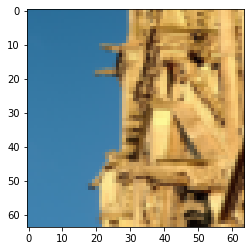

In [3]:
index = 69
plt.imshow(x_train_set[index])
print("it's a " + classes[np.squeeze(y_train_set[:,index])].decode("utf-8"))

Pre processing the datasets

In [4]:
m_train = x_train_set.shape[0]
m_test = x_test_set.shape[0]
px = x_train_set.shape[1]

# converting a matrix to a single vector
train_set_x_flat = x_train_set.reshape(m_train, -1).T
test_set_x_flat = x_test_set.reshape(m_test, -1).T

# Standardize the dataset
x_train = train_set_x_flat / 255
x_test = test_set_x_flat / 255

Mathematical expression for logistic regression.
$$z^{(i)} = w^T x^{(i)} + b $$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})$$
    

In [5]:
# initialize the parameters and helper methods 
def sigmoid(z):
    s = 1 / (1 + np.exp(-(z)))
    return s

In [6]:
# initializing weights and bais
def initialize_wb(dim):
    w = np.zeros((dim, 1))
    b = 0 
    return w, b

mathimatical expression for gradients and cost in logistic regression
-  $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Two formulas gradient: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

In [7]:
# Forward propagation and backward propagation in order to calculate the gradients and cost
def propagate(w,b,X,Y):
    m = X.shape[1]
#     print('m', m)
    A = sigmoid(np.dot(w.T, X) + b)
    cost =  -1/m * (np.dot(Y,np.log(A).T) + np.dot(1 - Y,  np.log(1 - A).T))

    dw = 1 / m * np.dot(X, (A-Y).T)
    db = 1 / m * np.sum(A-Y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [8]:
#optimize the parameters

def optimize(w,b,X,Y,num_iterations=100,learning_rate=0.005):
    costs = []
    for i in range(1,num_iterations+1):
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w -= learning_rate*dw
        b -= learning_rate*db
        
        if i % 100 == 0:
            print("Iterations {} : cost {}".format(i, cost))
            costs.append(cost)
        
    params = {"w":w, "b":b}
    grads = {"dw":dw, "db": db}
        
    return params, grads, costs

In [9]:
# predicting
def predict(w,b,X):
    y_prediction = np.zeros((1, X.shape[1]))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid(np.dot(w.T, X) + b)
#     print('A',A.shape, y_prediction.shape)
    for i in range(A.shape[1]):        
        if A[0,i] > 0.5:
            y_prediction[0,i] = 1
        else:
            y_prediction[0,i] = 0
            
    return y_prediction

In [10]:
# defining a model
def model(x_train_data,x_test_data,y_train,y_test,number_iteration=2000,learning_rate=0.005):
    dim = x_train.shape[0]
    w,b = initialize_wb(dim)
    
    params, grads,costs =  optimize(w,b,x_train_data,y_train,number_iteration,learning_rate)
    
    w = params['w']
    b = params['b']
    
    dw = grads['dw']
    db = grads['db']
    
    train_predict = predict(w,b,x_train_data)
    test_predict = predict(w,b,x_test_data)
    
    
    print("Accuracy for train : {} % ".format(100 - np.mean(np.abs(train_predict - y_train)) * 100))
    print("Accuracy for test : {} %".format(100 - np.mean(np.abs(test_predict - y_test)) * 100))
    
    d = {'w': w, 'b':b, 'costs': costs, 'learning_rate': learning_rate}
    return d

In [11]:
d = model(x_train, x_test, y_train_set,y_test_set)

Iterations 100 : cost 0.6448978829531701
Iterations 200 : cost 0.48489361414848486
Iterations 300 : cost 0.37776149521638075
Iterations 400 : cost 0.3317754055523588
Iterations 500 : cost 0.3035286720260554
Iterations 600 : cost 0.28009427757967503
Iterations 700 : cost 0.26022584756281886
Iterations 800 : cost 0.24310018399838854
Iterations 900 : cost 0.22814432769465368
Iterations 1000 : cost 0.2149437706968248
Iterations 1100 : cost 0.2031892821910463
Iterations 1200 : cost 0.19264428020365887
Iterations 1300 : cost 0.18312389153132902
Iterations 1400 : cost 0.17448101386887013
Iterations 1500 : cost 0.16659675354042902
Iterations 1600 : cost 0.15937369509858537
Iterations 1700 : cost 0.15273105849939209
Iterations 1800 : cost 0.14660114629898885
Iterations 1900 : cost 0.14092669166965172
Iterations 2000 : cost 0.13565884743936965
Accuracy for train : 99.04306220095694 % 
Accuracy for test : 70.0 %


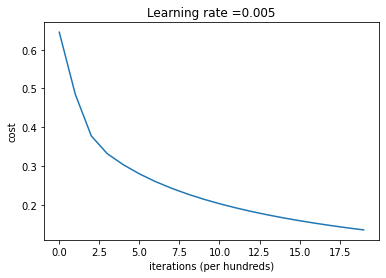

In [12]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

/home/gnanavel/anaconda3/envs/log_reg/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
/home/gnanavel/anaconda3/envs/log_reg/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning:     `imresize` is deprecated!
    `imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``skimage.transform.resize`` instead.
  # Remove the CWD from sys.path while we load stuff.


y = 1.0, your algorithm predicts a "cat" picture.


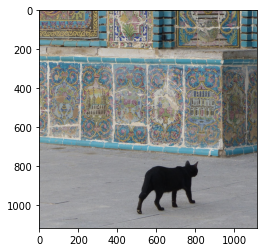

In [13]:
#testing with custom image
## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "catty.jpg"   # change this to the name of your image file 
## END CODE HERE ##

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
image = image/255.
my_image = scipy.misc.imresize(image, size=(px, px)).reshape((1,px*px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")